In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#1. Name any five plots that we can plot using the Seaborn library. Also, state the uses of each plot.
Here are five types of plots you can create using the Seaborn library:

1. Scatter Plot (`sns.scatterplot`):
    -Use: Visualize the relationship between two continuous variables. 
    -Example**: Plotting the relationship between `sepal_length` and `sepal_width` in the Iris dataset to identify patterns or correlations.

2. Box Plot (`sns.boxplot`):
   -Use: Display the distribution of a dataset and identify outliers. 
   -Example: Comparing the distribution of `total_bill` across different `days` in the Tips dataset to see variations in spending.

3. Histogram (`sns.histplot`):
   - Use: Visualize the distribution of a single continuous variable by grouping data into bins. 
   - Example: Showing the distribution of `total_bill` in the Tips dataset to understand spending behavior.

4. Pair Plot (`sns.pairplot`):
   - Use: Visualize pairwise relationships and distributions for multiple variables in a dataset. 
   - Example: Creating a matrix of scatter plots for the Iris dataset to examine relationships between different flower measurements.

5. Heatmap (`sns.heatmap`):
   - Use: Visualize matrix-like data, such as correlation matrices or grid data. 
   - Example: Displaying the correlation matrix of numerical variables in the Iris dataset to identify correlations between measurements.


In [3]:
#2.  Load the "fmri" dataset using the load_dataset function of seaborn. Plot a line plot using x ="timepoint" and y = "signal" for different events and regions.
fmri= sns.load_dataset('fmri')

In [4]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<Axes: xlabel='timepoint', ylabel='signal'>

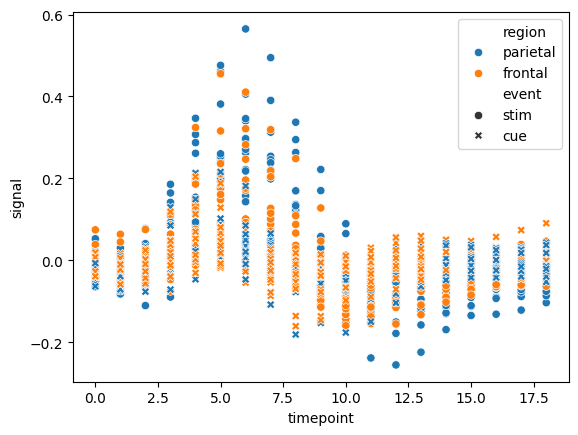

In [8]:
sns.scatterplot(x=fmri.timepoint, y=fmri.signal, data =fmri, hue='region',style='event')

In [5]:
# Que 3: Load the "titanic" dataset using the load_dataset function of seaborn. Plot two box plots using x ='pclass', y = 'age' and y = 'fare'.
titanic= sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


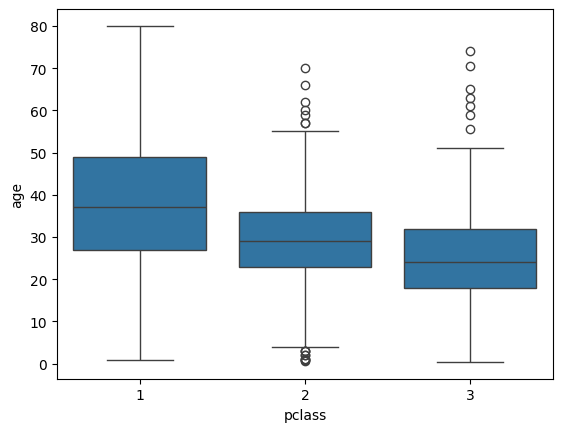

In [6]:
sns.boxplot(x='pclass', y='age',data=titanic)
plt.show()

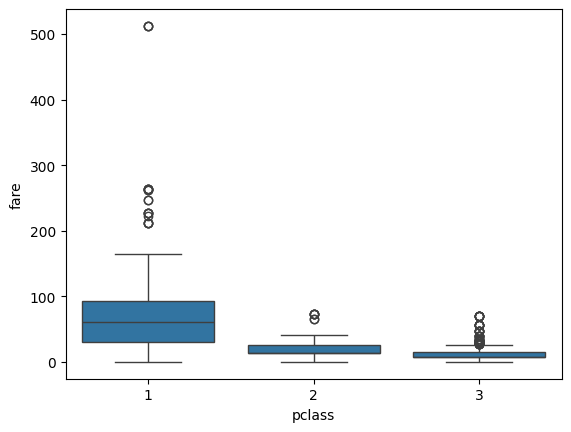

In [17]:
sns.boxplot(x='pclass', y='fare',data=titanic)
plt.show()

In [7]:
#4. Use the "diamonds" dataset from seaborn to plot a histogram for the 'price' column. Use the hue parameter for the 'cut' column of the diamonds dataset.
diamond=sns.load_dataset('diamonds')
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


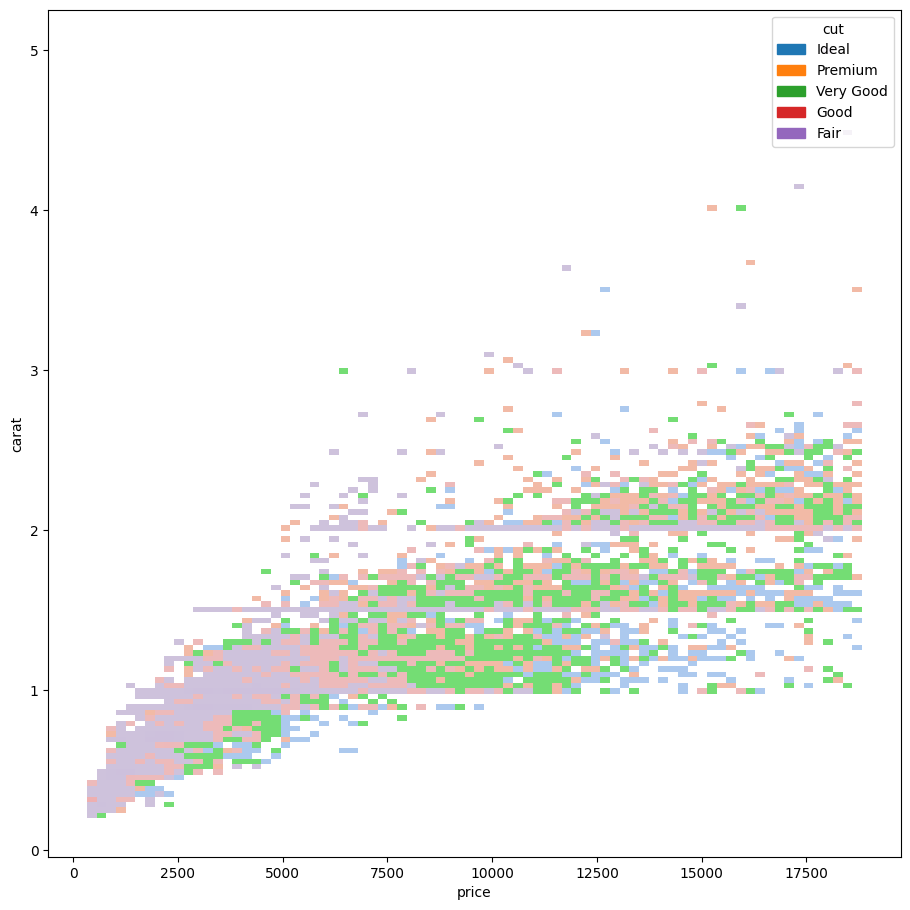

In [31]:
plt.figure(figsize=(11,11))
sns.histplot(y=diamond.carat, x=diamond.price, data =diamond, hue='cut')
plt.show()

In [30]:
#5. Use the "iris" dataset from seaborn to plot a pair plot. Use the hue parameter for the "species" columno f the iris dataset.
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


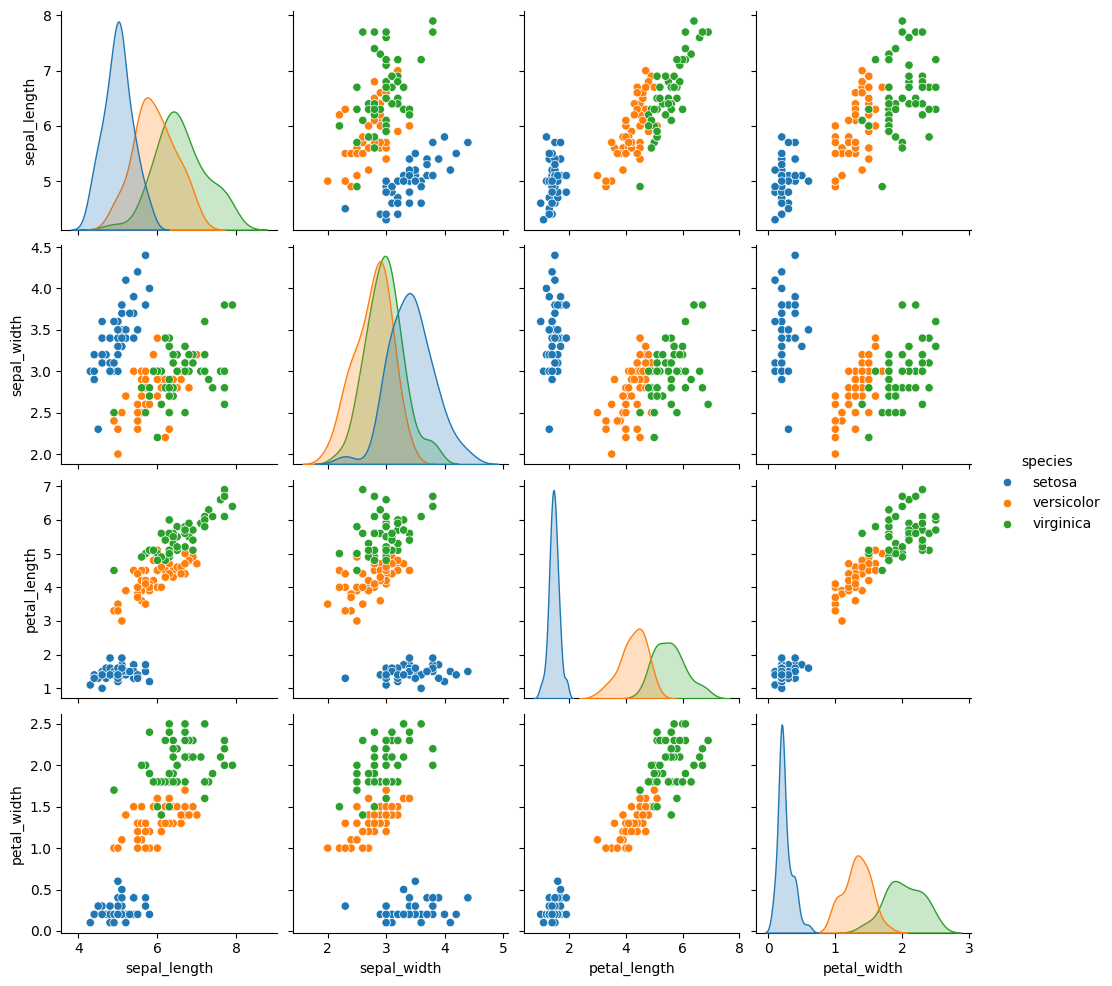

In [32]:
sns.pairplot(iris, hue='species')

In [2]:
#6.  Use the "flights" dataset from seaborn to plot a heatmap.
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
sns.heatmap(x=flights.year, y=flights.passengers, data =flights)

ValueError: could not convert string to float: 'Jan'

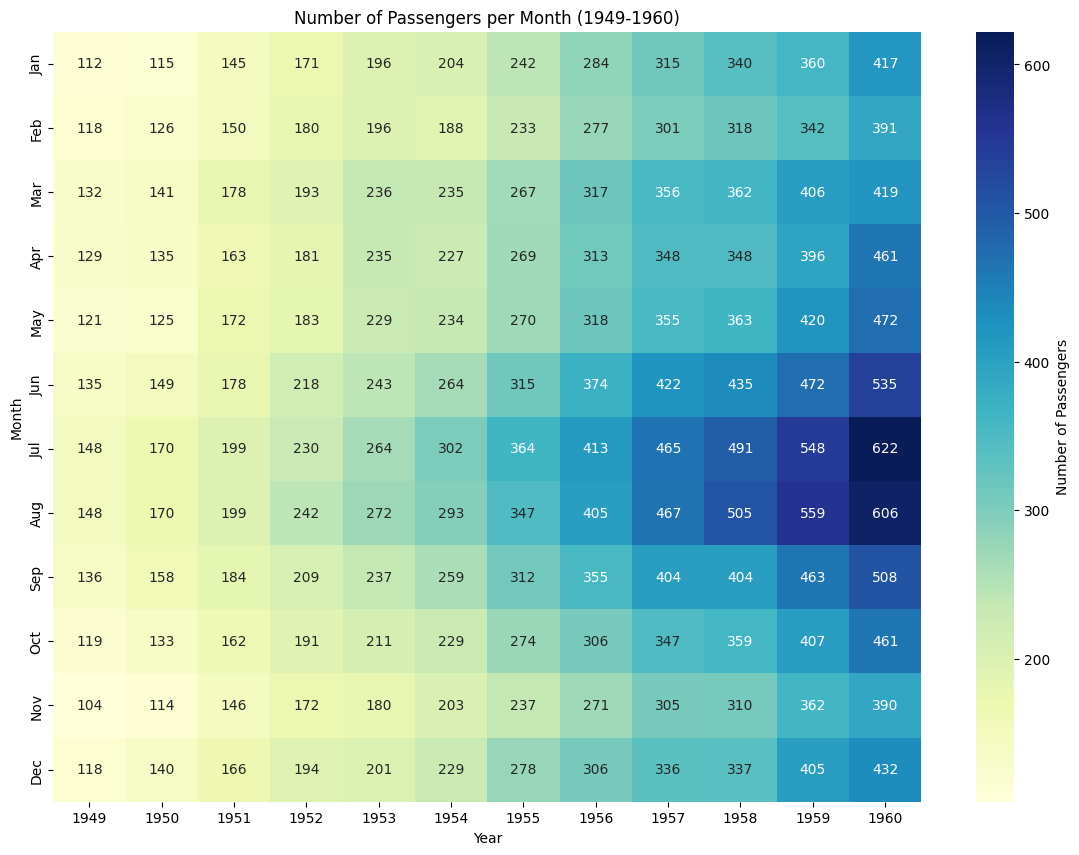

In [4]:
# first need to convert the months to categorical values and mention the order for heatmap 
flights['month'] = pd.Categorical(flights['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

# creating a matrix suing Pivot from pandas to give index, columns and values 
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')


plt.figure(figsize=(14, 10))  

# Create the heatmap with detailed parameters
sns.heatmap(flights_pivot, 
            annot=True,             # Annotate cells with their values
            fmt="d",                # Format annotations as integers
            cmap='YlGnBu',          # found this 'YlGnBu' colormap
            cbar_kws={'label': 'Number of Passengers'})  # Customize color bar label

# Customizing the plot
plt.title('Number of Passengers per Month (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Month')

# Show the plot
plt.show()
